<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">Convolutional Neural Network Layers</h1>
</div>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download

In [39]:
train_data = pd.read_csv(r'C:\D\Python-Projects\Machine-Learning\myfile\MNIST\mnist_train.csv')
test_data =  pd.read_csv(r'C:\D\Python-Projects\Machine-Learning\myfile\MNIST\mnist_test.csv')

display(train_data.head())
display(test_data.head())

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


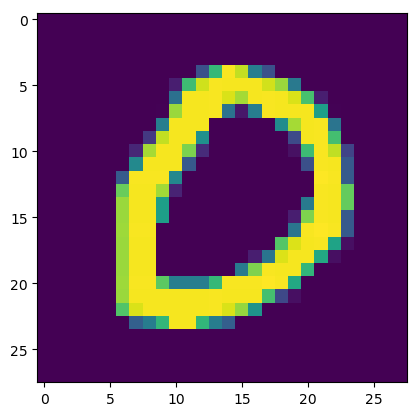

In [37]:
plt.imshow( train_data.iloc[2100].values[1:].reshape(28 , -1) )
plt.show()

<div style="background-color:#f9f9ff; padding: 20px; border: 2px solid #800080; border-radius: 10px;">

### &#128187; <span style="color:#4b0082;">DataLoader</span>

A **DataLoader** in PyTorch is an essential utility that simplifies the process of loading data during model training and evaluation. It handles batching, shuffling, and loading of data in parallel using multiprocessing workers. By converting datasets into manageable batches, it ensures efficient and seamless data feeding into the neural network, thereby optimizing training performance and scalability.

</div>


<div style="background-color:#f9f9f9; padding: 20px; border: 2px solid #9370db; border-radius: 10px;">

### 📝 <span style="color:#4b0082;">Understanding DataLoader Parameters</span>

**Batch Size**: Using a batch size allows us to divide the dataset into smaller, manageable chunks, which improves training efficiency and helps with memory management. By processing batches, we can also leverage the parallel processing capabilities of modern hardware, leading to faster training times.

**Data Types**:
- `dtype=torch.long`: This is used for integer data, particularly for categorical labels in classification tasks.
- `dtype=torch.float32`: This is used for floating-point data, ideal for numerical features that require precision.

**Shuffle=True for Training**: Shuffling the training data ensures that the model does not learn the order of the data, promoting better generalization by preventing the model from overfitting to the sequence of the training data.

</div>


In [48]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset


# Function to create DataLoader from DataFrame
def create_dataloader(df, batch_size=32, shuffle=True):
    # Convert DataFrame to tensors
    labels = torch.tensor(df.iloc[:, 0].values, dtype=torch.long)
    features = torch.tensor(df.iloc[:, 1:].values, dtype=torch.float32)

    # Create TensorDataset
    dataset = TensorDataset(features, labels)

    # Create DataLoader
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

    return dataloader

# Create DataLoaders for train and test datasets
batch_size = 64

train_loader = create_dataloader(train_data, batch_size=batch_size, shuffle=True)
test_loader = create_dataloader(test_data, batch_size=batch_size, shuffle=False)

# Example usage of the DataLoader
for batch_features, batch_labels in train_loader:
    print(batch_features, batch_labels)
    break  # Remove this line to iterate over the whole dataset


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 2, 9, 5, 2, 2, 0, 9, 7, 7, 3, 6, 8, 2, 3, 1, 8, 7, 6, 3, 4, 5, 8, 0,
        3, 4, 4, 6, 3, 6, 4, 0, 1, 3, 6, 4, 8, 5, 5, 8, 4, 1, 2, 6, 5, 0, 5, 4,
        7, 8, 3, 6, 0, 2, 0, 9, 7, 9, 9, 8, 7, 2, 3, 8])


<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### 🧠 <span style="color:#4682b4;">CNN Parameters Explanation</span>

When defining a Convolutional Neural Network (CNN) in PyTorch, understanding the parameters of the convolutional and linear layers is essential. Here are some key parameters:

- **in_channels**: The number of input channels in the convolutional layer. For example, in the first convolutional layer, `in_channels` is 1 for grayscale images.
- **out_channels**: The number of output channels produced by the convolutional layer. It determines the number of filters (or kernels) applied to the input.
- **kernel_size**: The size of the filter (or kernel) applied to the input. A common choice is a 3x3 kernel.
- **padding**: The number of pixels added to each side of the input. This is often used to control the spatial dimensions of the output feature maps. For example, `padding=1` adds a one-pixel border around the input.

### View Method

The `view` method in PyTorch is used to reshape tensors. In the context of CNNs, it is often used to flatten the output of convolutional layers before passing it to fully connected layers. The syntax is:

```python
x = x.view(batch_size, -1)


In [85]:
# Create a dummy input tensor with the shape of a single image from the MNIST dataset
dummy_input = torch.randn(2, 1, 28, 28)

# Forward pass through each layer
print(f"Input shape: {dummy_input.shape}")

Input shape: torch.Size([2, 1, 28, 28])


In [86]:
# Define each layer
conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)

x = conv1(dummy_input)
print(f"After conv1: {x.shape}")

After conv1: torch.Size([2, 32, 28, 28])


In [87]:
pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

x = pool(x)
print(f"After pool1: {x.shape}")

After pool1: torch.Size([2, 32, 14, 14])


In [88]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

x = conv2(x)
print(f"After conv2: {x.shape}")

After conv2: torch.Size([2, 64, 14, 14])


In [89]:
x = pool(x)
print(f"After pool2: {x.shape}")

After pool2: torch.Size([2, 64, 7, 7])


In [90]:
x = x.view(-1, 64 * 7 * 7)
print(f"After view: {x.shape}")

After view: torch.Size([2, 3136])


In [91]:
fc1 = nn.Linear(64 * 7 * 7, 128)

x = fc1(x)
print(f"After fc1: {x.shape}")

After fc1: torch.Size([2, 128])


In [92]:
batchnorm1 = nn.BatchNorm1d(128)

x = batchnorm1(x)
print(f"After batchnorm1: {x.shape}")

After batchnorm1: torch.Size([2, 128])


In [93]:
dropout1 = nn.Dropout(0.5)

x = dropout1(x)
print(f"After dropout1: {x.shape}")

After dropout1: torch.Size([2, 128])


In [94]:
fc2 = nn.Linear(128, 64)

x = fc2(x)
print(f"After fc2: {x.shape}")

After fc2: torch.Size([2, 64])


In [95]:
batchnorm2 = nn.BatchNorm1d(64)

x = batchnorm2(x)
print(f"After batchnorm2: {x.shape}")


After batchnorm2: torch.Size([2, 64])


In [96]:
dropout2 = nn.Dropout(0.5)

x = dropout2(x)
print(f"After dropout2: {x.shape}")

After dropout2: torch.Size([2, 64])


In [97]:
fc3 = nn.Linear(64, 10)

x = fc3(x)
print(f"After fc3: {x.shape}")

After fc3: torch.Size([2, 10])


In [49]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.dropout2(x)
        x = self.output(x)
        return x


In [50]:
import torch.optim as optim

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.view(-1, 1, 28, 28)  # Reshape images to [batch_size, channels, height, width]
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")


Epoch [1/10], Loss: 0.2602
Epoch [2/10], Loss: 0.0887
Epoch [3/10], Loss: 0.0680
Epoch [4/10], Loss: 0.0553
Epoch [5/10], Loss: 0.0489
Epoch [6/10], Loss: 0.0415
Epoch [7/10], Loss: 0.0361
Epoch [8/10], Loss: 0.0369
Epoch [9/10], Loss: 0.0306
Epoch [10/10], Loss: 0.0285
Training complete.


<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### 🧠 <span style="color:#4682b4;">Model Evaluation</span>

Evaluating the model is a crucial step in understanding its performance on unseen data. Here, we:

- **Set the model to evaluation mode**: This disables dropout layers and batch normalization.
- **Compute Predictions**: Using the trained model, we compute predictions for the test set.
- **Calculate Accuracy**: We compare the predicted labels to the true labels and calculate the accuracy of the model.

The accuracy metric gives us an insight into how well the model generalizes to new data, ensuring its practical applicability.

</div>


In [51]:
# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 1, 28, 28)  # Reshape images to [batch_size, channels, height, width]
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Test Accuracy: 99.29%


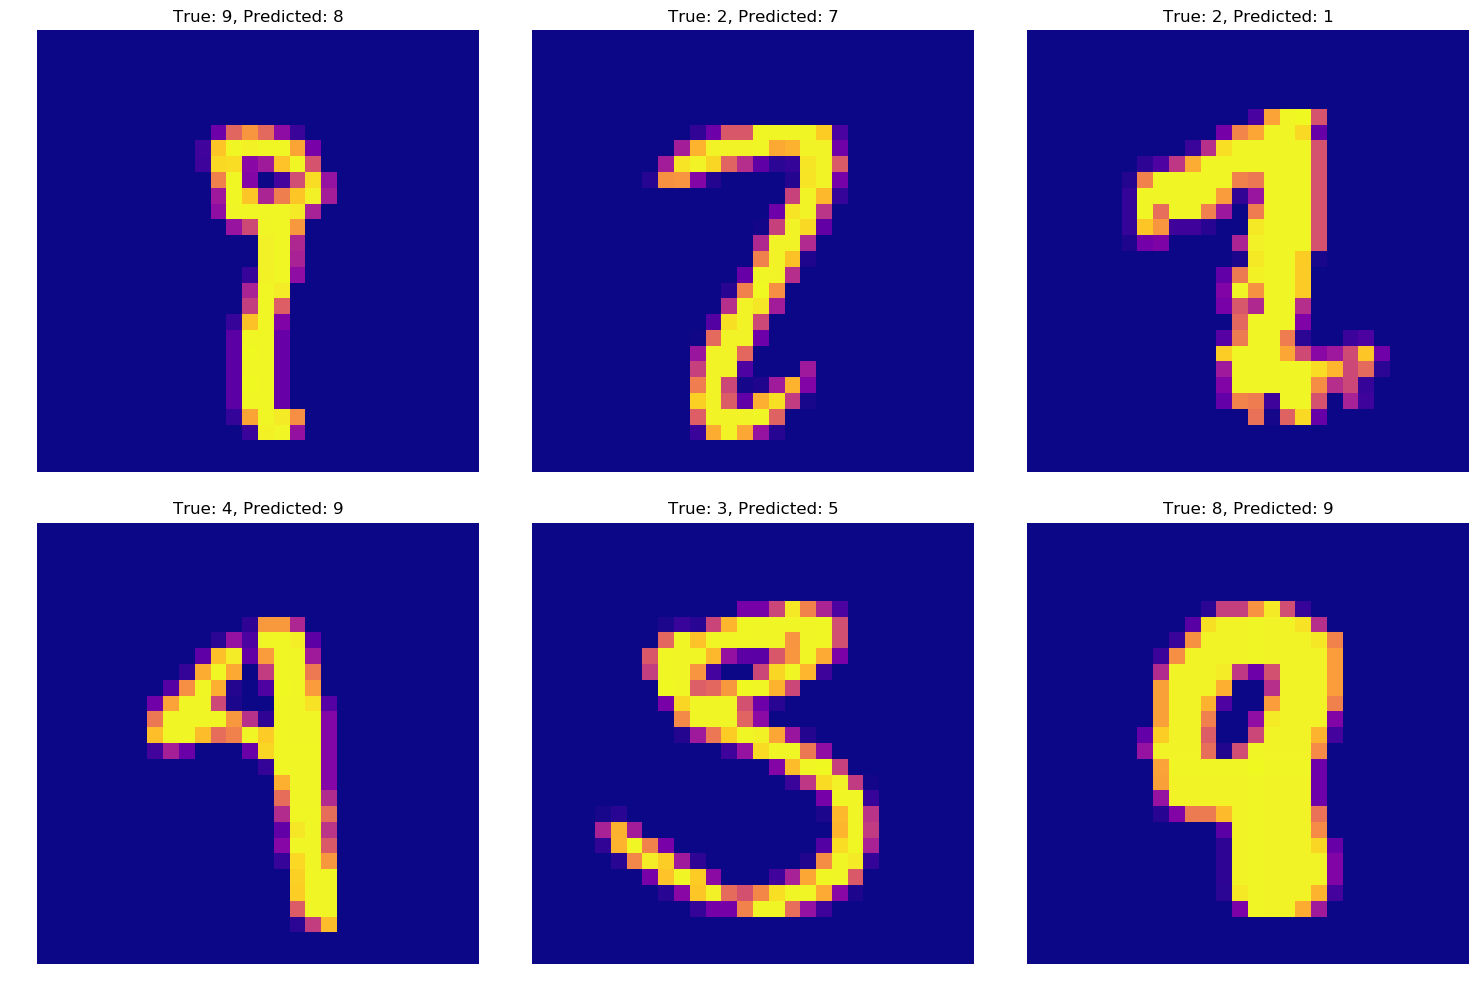

In [147]:
find_misclassified = create_dataloader(test_data, batch_size = 10000 , shuffle=False)

for images, labels in find_misclassified:
    images = images.view(-1, 1, 28, 28)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    break

    if predicted.item() != label.item():
        misclassified_examples.append((image.squeeze(), label.item(), predicted.item()))
        if len(misclassified_examples) == 3:
            break
            
indices = [i for i, (x, y) in enumerate(zip(  predicted  , labels)) if x != y][:6]

true_labels =[ labels[x ] for x in indices] # true labels
predicted_labels = [ predicted[x ] for x in indices]  # predicted labels
test_data_images = [test_data.drop('label' , axis = 1).iloc[x].values.reshape(28 , 28) for x in indices ]  #  test data images

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot each misclassified row with true and predicted labels
for i, ax in enumerate(axes.flatten()):
    ax.imshow(test_data_images[i], cmap='plasma')  # Assuming grayscale images
    ax.set_title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
